In [3]:
##2_IMPLEMENT FEED FORWARD NEURAL NETWORK::::::::::::
#a_import_imp_packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#grabbing the mnist dataset
#b_load_training_and_testing_datasets:::::::::::
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [5]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [6]:
#building the model
#c_define the network architecture:::::::::::
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [7]:
#d_train the model using sgd::::::::::
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10


469/469 [==============================] - 4s 5ms/step - loss: 2.2870 - accuracy: 0.1595 - val_loss: 2.2485 - val_accuracy: 0.1799
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.2206 - accuracy: 0.3459 - val_loss: 2.1830 - val_accuracy: 0.4617
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1461 - accuracy: 0.4941 - val_loss: 2.0938 - val_accuracy: 0.5806
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0409 - accuracy: 0.5699 - val_loss: 1.9657 - val_accuracy: 0.6100
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.8943 - accuracy: 0.6131 - val_loss: 1.7946 - val_accuracy: 0.6387
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 1.7110 - accuracy: 0.6499 - val_loss: 1.5958 - val_accuracy: 0.6704
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5142 - accuracy: 0.6841 - val_loss: 1.4006 - val_accuracy: 0.7061
Epoc

In [8]:
#making the predictions
#e_evaluate the network:::::::::::
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       980
           1       0.79      0.98      0.88      1135
           2       0.80      0.75      0.78      1032
           3       0.66      0.86      0.75      1010
           4       0.73      0.76      0.74       982
           5       0.85      0.40      0.55       892
           6       0.83      0.90      0.86       958
           7       0.78      0.89      0.83      1028
           8       0.87      0.49      0.63       974
           9       0.73      0.65      0.68      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.77      0.76     10000



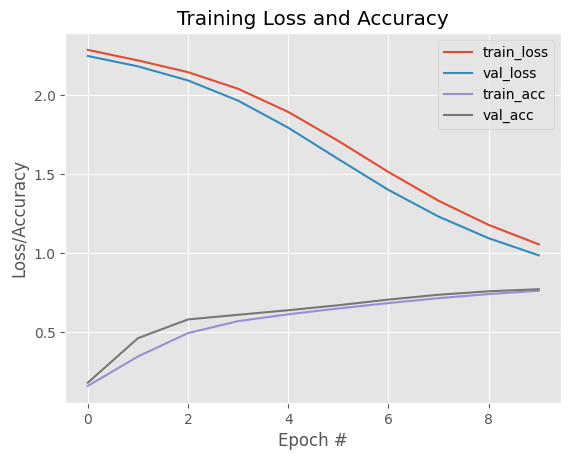

In [9]:
#f_plot_the_training_loss_and_accuracy:::::::::::
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()